In [174]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import string
from sklearn.feature_extraction.text import CountVectorizer

In [116]:
diabetes= pd.read_csv(r'E:\INCEPTEZ\Training\Basics_python\diabetes.csv')

In [5]:
diabetes.shape

(768, 9)

In [6]:
diabetes.head(8)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES
5,5,116,74,0,0,25.6,0.201,30,NO
6,3,78,50,32,88,31.0,0.248,26,YES
7,10,115,0,0,0,35.3,0.134,29,NO


In [7]:
diabetes.columns

Index(['Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)', ' Class variable'],
      dtype='object')

In [8]:
x = diabetes.drop(' Class variable', 1)

C:\Users\MUTHUK~1\AppData\Local\Temp/ipykernel_11336/570492839.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = diabetes.drop(' Class variable', 1)


In [9]:
x[:4]

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21


In [10]:
y = diabetes.iloc[:, -1]

In [11]:
y[:4]

0    YES
1     NO
2    YES
3     NO
Name:  Class variable, dtype: object

### Train test split

In [12]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2 , random_state=100000)

### Modeling

In [13]:
model = GaussianNB()

In [14]:
model.fit(x_train, y_train)

GaussianNB()

### prediction

In [15]:
y_pred = model.predict(x_test)

###  Modelmetrrics

In [16]:
acc_score = accuracy_score(y_test, y_pred)

In [17]:
print(acc_score)

0.7467532467532467


### confusion_matrix

In [18]:
confusion_matrix(y_test, y_pred)

array([[83, 12],
       [27, 32]], dtype=int64)

In [19]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

          NO       0.75      0.87      0.81        95
         YES       0.73      0.54      0.62        59

    accuracy                           0.75       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



###  TO check wrongly matched records  by model

In [20]:
# result = X_test[y_test != y_predict].reset_index(drop=True)
# test = pd.DataFrame(y_test[y_test != y_predict]).rename(columns={'Class variable':'Actual'}).reset_index(drop=True)
# pred = pd.DataFrame(y_predict[y_test != y_predict]).rename(columns={0:'Predicted'}).reset_index(drop=True)
# pd.concat([result,test,pred],axis=1).reset_index(drop=True)


In [21]:
!pip install yellowbrick
from yellowbrick.classifier import ConfusionMatrix



C:\Users\Muthukumaran\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


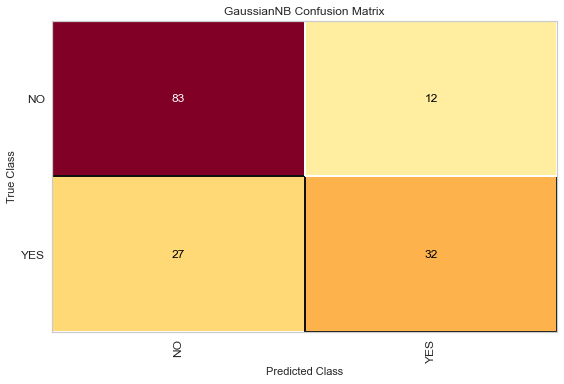

<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [22]:
cm = ConfusionMatrix(model, classes=['NO','YES'])
cm.fit(x_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(x_test, y_test)

# How did we do?
cm.show()

### reading a spam file

In [220]:
df = pd.read_csv(r'E:\INCEPTEZ\Training\Basics_python\spam.tsv', sep='\t', names=['Class','message'])

In [221]:
df.head(5)

,Class,message
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!!


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567 entries, 0 to 5566
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5567 non-null   object
 1   message  5567 non-null   object
dtypes: object(2)
memory usage: 87.1+ KB


In [223]:
df.describe()

,Class,message
count,5567,5567
unique,2,5164
top,ham,"Sorry, I'll call later"
freq,4821,30


In [224]:
df['length'] = df['message'].str.len()

In [225]:
df

,Class,message,length
0,ham,I've been searching for the right words to tha...,196
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,ham,"Nah I don't think he goes to usf, he lives aro...",61
3,ham,Even my brother is not like to speak with me. ...,77
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!!,36
...,...,...,...
5562,spam,This is the 2nd time we have tried 2 contact u...,160
5563,ham,Will ü b going to esplanade fr home?,36
5564,ham,"Pity, * was in mood for that. So...any other s...",57
5565,ham,The guy did some bitching but I acted like i'd...,125


In [226]:
# df['message'].apply(len)

In [227]:
df['length'].describe()

count    5567.000000
mean       80.450153
std        59.891023
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [228]:
df[df['length'] == 910]

,Class,message,length
1080,ham,For me the love should start with attraction.i...,910


In [229]:
df['Class'] = df['Class'].map({'ham':0,'spam':1})


In [230]:
df[:5]

,Class,message,length
0,0,I've been searching for the right words to tha...,196
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,0,"Nah I don't think he goes to usf, he lives aro...",61
3,0,Even my brother is not like to speak with me. ...,77
4,0,I HAVE A DATE ON SUNDAY WITH WILL!!!,36


In [231]:
df.dtypes

Class       int64
message    object
length      int64
dtype: object

In [232]:
df['Class'].values

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

### Remove the Punctuations

In [233]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [234]:
def cleanMessage(message):
    nonPunc =[word for word in message if word not in string.punctuation]
    nonPunc = ''. join(nonPunc)
    return nonPunc

In [235]:
df['message']=df['message'].apply(cleanMessage)

In [236]:
df[:5]

,Class,message,length
0,0,Ive been searching for the right words to than...,196
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,0,Nah I dont think he goes to usf he lives aroun...,61
3,0,Even my brother is not like to speak with me T...,77
4,0,I HAVE A DATE ON SUNDAY WITH WILL,36


### CountVecorizer

In [237]:
cv =CountVectorizer(stop_words='english')

In [238]:
x =df['message'].values
y =df['Class'].values

In [239]:
x

array(['Ive been searching for the right words to thank you for this breather I promise i wont take your help for granted and will fulfil my promise You have been wonderful and a blessing at all times',
       'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s',
       'Nah I dont think he goes to usf he lives around here though', ...,
       'Pity  was in mood for that Soany other suggestions',
       'The guy did some bitching but I acted like id be interested in buying something else next week and he gave it to us for free',
       'Rofl Its true to its name'], dtype=object)

In [240]:
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

### Train test split

In [241]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2)

In [242]:
x_train_cv

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [243]:
x_train_cv =cv.fit_transform(x_train)

### Modeling -NB

In [244]:
model = GaussianNB()

In [245]:
y_train= y_train.astype('int')

In [246]:
x_train_cv = x_train_cv.todense()

In [247]:
model.fit(x_train_cv, y_train)

C:\Users\Muthukumaran\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


GaussianNB()

In [248]:
x_test_cv =cv.transform(x_test)

In [249]:
x_test_cv = x_test_cv.todense()

In [250]:
y_pred = model.predict(x_test_cv)

C:\Users\Muthukumaran\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [253]:
len(y_test), len(y_pred)

(1114, 1114)

In [255]:
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.8770197486535009

### spam classifier app

In [260]:

msg1 = input('please enter messgae ')
msg = [msg1]
msginput = cv.transform(msg)
predcition = model.predict(msginput.todense())
if(predcition[0]==0):
    print('********MSG to INBOX********')
else:
    print('********MSG to SPAM********')


please enter messgae Even my brother is not like to speak with me
********MSG to SPAM********


C:\Users\Muthukumaran\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
